<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment4/Assignment4_4th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### On this model, on top of basic model I'm changing following things


1.   Adding droput at different layers
2.   Increasing number of epoch to 40
3. Batch normalization
4. Some parameter tuning like batch size, place of MaxPooling, final convolution


### Importing Keras library 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Importing other required library

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Displaying the first image from the dataset

(60000, 28, 28)


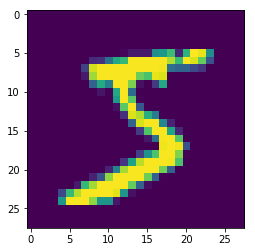

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshaping the train test dataset by defining number of channel for the input image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the train and test data set by dividing 255, as 255 is the maximum value for a channel in an image and minimum is 0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### displaying last 10 values from the output of train dataset

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### As this is a classification problem with 10 labels(0-9 numbers), so here we are converting the labels into hot encoding to use in the model prediction

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Displying the last 10 values from the output of train dataset after hot encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Less than 15k paramter and target validation accuracy > 99.4%

### Model defination
#### This is a very simple model, along with convultion layer I have added 
1. 1x1 convolution and Maxpooling
2. Added dropout
3. Increased number of epochs during model training 
4. Added batch normalization
5. Some parameter tuning like batch size, place of MaxPooling, final convolution

In [10]:
from keras.layers import Activation, MaxPooling2D, Dropout, BatchNormalization
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x10

model.add(Convolution2D(16, 3, 3, activation='relu')) # 26x26x10 -> (3x3x10) x 20 -> 24x24x20
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 26x26x20 -> (3x3x20) x 30 -> 22x22x30
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x30
model.add(Convolution2D(10, 1, activation='relu')) # 11x11x30 -> (1x1x32) x10 -> 11 x 11 x 10
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu')) # 11x11x10 => (3x3x10) x 16 => 9x9x20
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Convolution2D(10, 1, activation='relu')) # 9x9x20 => (1x1x32) x 10 => 9x9x10
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 7x7x10

model.add(Convolution2D(10, 7)) # 7x7x10 => (7x7x10) => 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


#### Displaying model summary 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
__________

#### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Train the model

In [13]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpointer = ModelCheckpoint(filepath='assignment4_model_4.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 13s 220us/step - loss: 0.2214 - acc: 0.9306 - val_loss: 0.0947 - val_acc: 0.9691

Epoch 00001: val_acc improved from -inf to 0.96910, saving model to assignment4_model_4.h5
Epoch 2/40
60000/60000 [==============================] - 11s 178us/step - loss: 0.0680 - acc: 0.9786 - val_loss: 0.0897 - val_acc: 0.9723

Epoch 00002: val_acc improved from 0.96910 to 0.97230, saving model to assignment4_model_4.h5
Epoch 3/40
60000/60000 [==============================] - 11s 179us/step - loss: 0.0558 - acc: 0.9822 - val_loss: 0.0434 - val_acc: 0.9869

Epoch 00003: val_acc improved from 0.97230 to 0.98690, saving model to assignment4_model_4.h5
Epoch 4/40
60000/60000 [==============================] - 11s 178us/step - loss: 0.0454 - acc: 0.9853 - val_loss: 0.0500 - val_acc: 0.9836

Epoch 00004: val_acc did not improve from 0.98690
Epoch 5/40
60000/60000 [==============================] - 11s

In [0]:
# Load the weights with the best validation accuracy:
model.load_weights('assignment4_model_4.h5')

#### Validate the model accuracy with test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Printing the validation accuracy

In [16]:
print(score)

[0.02422195719825686, 0.9923]


### Predicting the test data outout using the model

In [0]:
y_pred = model.predict(X_test)

### Printing last 10 predicted(probability like) vs actual output 

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[4.02774941e-14 9.52805390e-10 3.25294636e-08 4.37083507e-08
  6.05271152e-15 1.01689664e-12 1.91501957e-20 9.99999762e-01
  1.76222942e-11 7.13904882e-08]
 [5.17602450e-09 3.14205863e-06 9.99978065e-01 2.41473725e-12
  4.66178051e-07 5.47017596e-12 1.83654774e-05 1.59097582e-10
  3.60595841e-12 1.77207261e-12]
 [6.13606543e-09 9.99969840e-01 2.66043845e-08 4.18440491e-11
  1.11724557e-05 1.77752852e-08 2.75984071e-08 1.87961123e-05
  9.41804590e-09 1.25274667e-07]
 [9.99953151e-01 5.49300677e-13 8.41267334e-10 2.49720156e-09
  1.56821403e-10 1.59082223e-08 4.04972670e-05 2.04395807e-08
  7.80980827e-08 6.18293598e-06]
 [7.79663487e-12 7.88129492e-11 4.33285241e-10 1.32081845e-13
  9.99945521e-01 4.66245911e-13 2.76844225e-11 1.82280961e-11
  1.06186754e-07 5.43139031e-05]
 [1.38073553e-09 9.99912858e-01 2.64705093e-08 4.92989438e-13
  2.62871836e-05 4.08647866e-10 6.03124262e-09 6.05168498e-05
  1.58129581e-08 3.02354209e-07]
 [5.00142833e-16 1.62751252e-08 5.88333151e-08 4.48453557e